# Preface

## Objective and Approach

Goal: By the end of the book you should be able to implement programs capable of learning from data!

Python Frameworks to Use:

* Scikit-Learn: Easy to use, entry point to learning ML
* TensorFlow: more complex library, great to train and run very large neural networks (NN)
* Keras: high-level deep learning Application Programming Interface (API), makes it simple to train and run NN, comes with TensorFlow


All code examples are already provided online at https://github.com/ageron/handson-ml3, as jupyter notebooks. This is just a personal repository to play with the code and summarize the book for myself.

Prerequisites:

* NumPy
* Pandas
* Matplotlib
* Linear Algebra
* Differential Calculus

If not familiar, have a look at https://homl.info/tutorials. The book is divided into two parts: 1. The Fundamentals of Machine Learning (Scikit-Learn), and 2. Neural Networks and Deep Learning (TensorFlow+Keras). 

## Other Resources

* Andrew Ng's ML course on Coursera: https://www.coursera.org/learn/machine-learning
* Scikit-Learn's User Guide: https://scikit-learn.org/stable/user_guide.html
* Interactive Tutorials: https://www.dataquest.io
* ML blogs: https://www.quora.com/What-are-the-best-artificial-intelligence-blogs-newsletters
* ML competitions: https://www.kaggle.com

# Chapter 1 - The Machine Learning Landscape

This notebook follows the first chapter and plays with the examples given in the book. I will also try to answer the questions in the book that are asked to the reader.

## Prerequisites to run our code

Make sure we use the required python version or above. Note to myself: I am using the system version of python. 

In [1]:
import sys
assert sys.version_info >= (3, 7)

Import essential packages:

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Use same plot settings as in the book:

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Make this notebook's output stable across runs, we choose a specific random seed:

In [4]:
import numpy as np

np.random.seed(42)

## Theory

### Machine Learning in a Nutshell

Machine Learning is the science (and art) of programming computers so they can learn from data. It is the "field of study that gives computers the ability to learn without being explicitly programmed" (Arthur Samuel, 1959).

ML system:

* Training set/data: Examples that the system uses to learn, each example is called a 'training instance/sample'
* Model: ML system part that learns and makes predictions, e.g. NN, random forests

Usual advantages of ML:
* No fine-tuning or long list of rules: program can be shorter, be easier to maintain, be more accurate compared to classical computer programs
* automatically adapts to changes (fluctuating environments) compared to classical computer programs
* Complex problems that have no known algorithm, e.g. speech recognition
* can help humans learn by identifying best predictors for tasks and reveal correlations $\to$ Discover hidden patterns in big data (Data Mining)

### Types of Machine Learning Systems

Classify into categories dependend on:
* How are they supervised? Examples: Supervised, unsupervised, semi-supervised, self-supervised, and others
* Learning process: Online vs batch learning
* Instance vs. model-based learning: compare new data points to known data points, or detecting patterns in training data and building predictive model

#### Training Supervision

We will discuss: Supervised learning, unsupervised learning, self-supervised learning, semi-supervised learning, and reinforcement learning

##### Supervised Learning

In supervised learning, the training set for the algorithm is *labeled* (right/wrong, cats/dogs, spam/ham, ...). As already can be guessed from the label examples, classification is a typical supervised learning task. Another example is to predict a *target* numeric value (e.g. price) given some features (age, brand, etc). This task is called regression.

Typical tasks summarised:
* Classification (commonly using labels)
* Regression (commonly using targets)

##### Unsupervised Learning

In unsupervised learning, the training data is unlabeled. For examples, if you like to sort a lot of data into groups (clustering), or even further into sub-groups (hierarchical clustering). Another example are visualisation algorithms where you would like to find representations of complex data for plotting them easier. Closely related to that is dimensionality reduction where the data is simplified, for example by merging correlated features into one (feature extraction).

Tip: It might be helpful to use a dimensionality reduction algorithm before feeding it to another ML algorithm, to save disk space, run faster, and maybe even perform better.

Anomaly detection says if a new instance is "normal" (like the vast majority of training data) or is likely an anomaly/outlier (rare in data, or not in data). This can be used to remove outliers before using another ML algorithm. Similar is novelty detection. This requires very "clean" data and detects new instances that are different from all instances in the training data.

Association rule learning discovers interesting relations between attributes in large data sets.

Typical tasks summarised:
* Clustering, hierarchical clustering
* Visualisation
* Dimensionality reduction
* Anomaly detection
* Novelty detection
* Association rule learning

##### Semi-supervised Learning

Semi-supervised Learning algorithms are able to deal with data that is only partially labeled. This can be beneficial since labeling is time-consuming and costly. For example if you have a large photo collection, the unsupervised part of the algorithm might cluster pictures based on who is in there. Once you give a label (name) to all people, the algorithm can name everyone in every picture.
So mostly it is a combinational of unsupervised+supervised algorithms. Once the data is all labeled, a supervised algorithm can take over.

##### Self-supervised Learning

The task is to generate a fully labeled dataset from a fully unlabeled one. For example, damaged or masked images (unlabeled) should recover the original image (labeled targets). This can be also used to categorize data since the algorithm should be able to learn which features to add for a certain category. This is called Transfer Learning.

Question: Why is it called self-supervised learning when it is using labels in the training? Some might even consider it unsupervised learning since it deals with fully unlabeled datasets. But self-supervised learning uses (generated) labels during training, so is supervised in that regard. 

Summary: 
* unsupervised learning generally deals with clustering, dimensionality reduction, anomaly detection
* self-supervised learning focuses on same tasks as supervised learning: classification, regression.

##### Reinforcement Learning

The learning system is called an agent which can observe the environment, select and perform actions, and get rewards or penalties in return. It is learning a strategy (policy) to only receive rewards. Examples are robots.

#### Batch vs. Online Learning

Does the machine learning system learn incrementally from a stream of incoming data or offline in batches?

##### Batch learning
In batch learning, the system must be trained using all available data. First the system is trained offline (*offline learning*) which will take a lot of time and computing resources, then it is launched into production and runs without learning more. A negative effect of batch learning is that the model's performance tends to decay slowly over time (*model rot/ data drift*). Therefore, it has to be retrained on up-to-date data+the old data. 

Note: For image recognition models have to be retrained not neccessarily because the objects change (e.g. cats and dogs) but the images change in format, sharpness, brightness, size ratios etc...

##### Online learning
A better option often to process large, continuously increasing and changing data sets and include them in your model is online learning! Here, you train the system incrementally/ on the fly by feeding it data instances either individually or in small groups called *mini-batches*. Online learning is particuarly advantageous for extremely rapidly changing data (e.g. stock market) and limited resources (e.g. trained on your phone).

Technical details:
* out-of-core learning: If you train on huge datasets that cannot fit one machine's main memory (out-of-core learning), the data can be chopped into pieces and trained step by step. Out-of-core learning is usually done offline, so think of it more as incremental learning.
* Learning rate: An important parameter of online learning is the *learning rate* which tells you how rapidly your system will adapt to new data, but it will also tend to quickly forget old data if the learning rate is high. With a slow learning rate, your system will learn more slowly, but will also be less sensitive to noise in the new data or sequences of nonrepresentative data points (outliers).
* Monitoring of the system: If it's a live system and a lot of bad data is fed to the system (spam, bugs), you need to monitor the system and switch learning off if you detect a drop in performance. With an anomaly detection algorithm, you can additionally react to abnormal data immediately.


#### Instance-Based Versus Model-Based Learning

Most machine learning tasks are about making predictions for examples they've never seen before based on data that they're trained on. There are two main approaches to how systems generalize to new instances:

* *Instance-based learning* requires a measure of similarity to determine how much two instances have in common. Here, the system learns the data examples by heart and compares new examples to the learned examples.
* *Model-based learning* generalizes from a set of examples by building a model of these examples. Model-based learning is executed in the following steps:
    1. Study the data
    2. Select a model
    3. Train the model on training data (learning algorithm searches for model parameter values that minimize the cost function)
    4. Apply the model to make predictions on new cases (inference)

###### Example for a model-based approach
You want to know if money makes people happy. So you compare the gross domestic product (GDP) per capita of countries and the Life satisfaction index. 

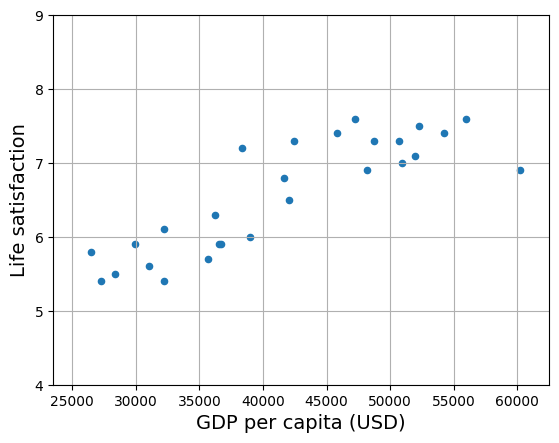

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

Step by step procedure for model-based learning:
#### 1. Data Study: 

Taking a look at the data, it looks like life satisfaction goes up linearly as the country's GDP per capita increases.

##### 2. Model Selection:

A simple linear model is given by
\begin{align}
{\rm life~satisfaction} =  \theta_0+\theta_1\cdot {\rm GDP/capita}
\end{align}

In [9]:
# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(model.predict(X_new)) # outputs [[6.30165767]]

[[6.30165767]]
